In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Loading + Preprocessing Data

In [2]:
dataset_dir = "/Users/annie/Documents/DATA_207/finalproj/CIFAKE/"
#Thank you for running this :) 
#dataset_dir = "FILLIN"

img_height = 32
img_width = 32
batch_size = 500

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "train",
  validation_split=0.2,
  subset="training",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = 80000)
train_ds

Found 100000 files belonging to 2 classes.
Using 80000 files for training.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "train",
  validation_split=0.2,
  subset="validation",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = 20000)
val_ds

Found 100000 files belonging to 2 classes.
Using 20000 files for validation.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [4]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "test",
  seed = 512,
  image_size = (img_height, img_width), 
  batch_size = 20000)
test_ds

Found 20000 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
train_list = list(train_ds)

2024-04-07 16:55:51.154631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [80000]
	 [[{{node Placeholder/_4}}]]
2024-04-07 16:55:51.154810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [80000]
	 [[{{node Placeholder/_4}}]]
2024-04-07 16:55:51.203052: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [6]:
train_imgs = train_list[0][0].numpy()
train_labels = train_list[0][1].numpy()

In [7]:
norm_train_imgs = train_imgs/255.0
norm_train_imgs.shape

(80000, 32, 32, 3)

In [8]:
classes = train_ds.class_names

In [9]:
val_list = list(val_ds)
val_imgs = val_list[0][0].numpy()
val_labels = val_list[0][1].numpy()

2024-04-07 16:55:58.581535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]
2024-04-07 16:55:58.581741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]


In [10]:
norm_val_imgs = val_imgs/255.0
norm_val_imgs.shape

(20000, 32, 32, 3)

In [11]:
nsamples, nx, ny, nrgb = norm_train_imgs.shape
norm_train_imgs2 = norm_train_imgs.reshape((nsamples,nx*ny*nrgb))
norm_train_imgs2.shape

(80000, 3072)

In [12]:
nsamplesv, nxv, nyv, nrgbv = norm_val_imgs.shape
norm_val_imgs2 = norm_val_imgs.reshape((nsamplesv,nxv*nyv*nrgbv))
norm_val_imgs2.shape

(20000, 3072)

In [13]:
test_list = list(test_ds)
test_imgs = test_list[0][0].numpy()
test_labels = test_list[0][1].numpy()

2024-04-07 16:56:01.336419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]
2024-04-07 16:56:01.336758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]


In [14]:
norm_test_imgs = test_imgs/255.0
testsamples, testx, testy, testrgb = norm_test_imgs.shape
norm_test_imgs2 = norm_test_imgs.reshape((testsamples,testx*testy*testrgb))
norm_test_imgs2.shape

(20000, 3072)

# Neural Network Model

In [15]:
len(classes)

2

In [16]:
n_classes = len(classes)
hidden_layer_sizes=[256,128]
activation='relu'
optimizer='Adam',
learning_rate=0.01

tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)
    
model = tf.keras.Sequential()
#model.add(Dense(16, input_shape=(X.shape[1],)

model.add(tf.keras.layers.Flatten())
    
for hidden_layer_size in hidden_layer_sizes:
    model.add(tf.keras.layers.Dense(units=hidden_layer_size,
                                    activation=activation,))
        
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

if optimizer == 'Adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)

model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


    


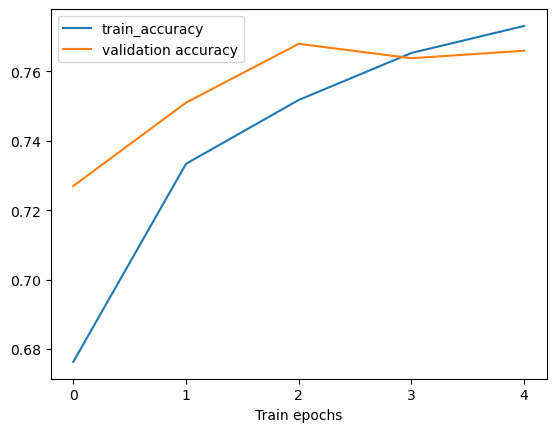

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 819,713
Trainable params: 819,713
Non-trainable params: 0
_________________________________________________________________
None


In [17]:

learning_rate=0.01,
num_epochs=5
      

# Train the model.
history = model.fit(x=norm_train_imgs2,y=train_labels, epochs=num_epochs, batch_size=64,
                    validation_data=(norm_val_imgs2, val_labels),verbose=0)


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy, label='train_accuracy')
plt.plot(val_accuracy, label='validation accuracy')
plt.xticks(range(num_epochs))
plt.xlabel('Train epochs')
plt.legend()
plt.show()



print(model.summary())


In [18]:
print(train_accuracy[-1])
print(val_accuracy[-1])

0.7730500102043152
0.7659000158309937


In [19]:
hidden_layer_sizes=[256, 128]
activation='tanh'
optimizer='SGD',
learning_rate=0.01

tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)
    
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten())
    
for hidden_layer_size in hidden_layer_sizes:
    model2.add(tf.keras.layers.Dense(units=hidden_layer_size,
                                    activation=activation,))
        
model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

if optimizer == 'Adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)

model2.compile(loss='binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])



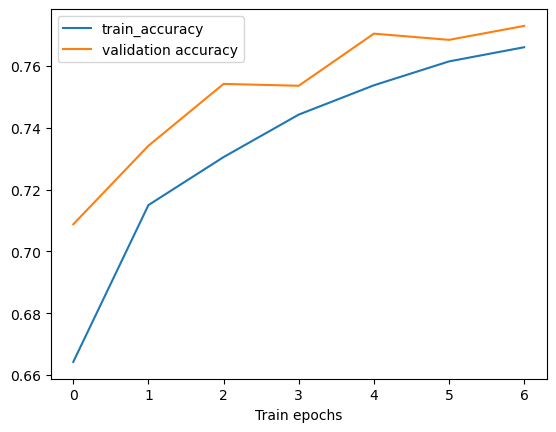

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 819,713
Trainable params: 819,713
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
num_epochs2=7
      

# Train the model.
history2 = model2.fit(x=norm_train_imgs2,y=train_labels, epochs=num_epochs2, batch_size=64,
                    validation_data=(norm_val_imgs2, val_labels),verbose=0)


train2_accuracy = history2.history['accuracy']
val2_accuracy = history2.history['val_accuracy']
plt.plot(train2_accuracy, label='train_accuracy')
plt.plot(val2_accuracy, label='validation accuracy')
plt.xticks(range(num_epochs2))
plt.xlabel('Train epochs')
plt.legend()
plt.show()



print(model2.summary())

In [21]:
print(train2_accuracy[-1])
print(val2_accuracy[-1])



0.7660124897956848
0.7728999853134155


In [22]:
hidden_layer_sizes=[256, 128]
activation='relu'
optimizer='SGD',
learning_rate=0.01

tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)
    
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Flatten())
    
for hidden_layer_size in hidden_layer_sizes:
    model3.add(tf.keras.layers.Dense(units=hidden_layer_size,
                                    activation=activation,))
        
model3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

if optimizer == 'Adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)

model3.compile(loss='binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])



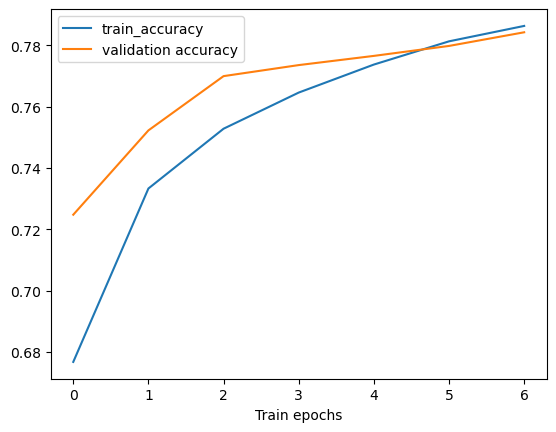

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 819,713
Trainable params: 819,713
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
num_epochs3=7
      

# Train the model.
history3 = model3.fit(x=norm_train_imgs2,y=train_labels, epochs=num_epochs3, batch_size=64,
                    validation_data=(norm_val_imgs2, val_labels),verbose=0)


train3_accuracy = history3.history['accuracy']
val3_accuracy = history3.history['val_accuracy']
plt.plot(train3_accuracy, label='train_accuracy')
plt.plot(val3_accuracy, label='validation accuracy')
plt.xticks(range(num_epochs3))
plt.xlabel('Train epochs')
plt.legend()
plt.show()



print(model3.summary())

In [24]:
print(train3_accuracy[-1])
print(val3_accuracy[-1])

0.7863749861717224
0.7843000292778015


In [31]:
n_classes = len(classes)
hidden_layer_sizes=[256, 256]
activation='relu'
optimizer='SGD'

tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)
    
model4 = tf.keras.Sequential()
#model.add(Dense(16, input_shape=(X.shape[1],)

model4.add(tf.keras.layers.Flatten())
    
for hidden_layer_size in hidden_layer_sizes:
    model4.add(tf.keras.layers.Dense(units=hidden_layer_size,
                                    activation=activation,))
        
model4.add(tf.keras.layers.Dense(1, activation="sigmoid"))

if optimizer == 'Adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

model4.compile(loss='binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])



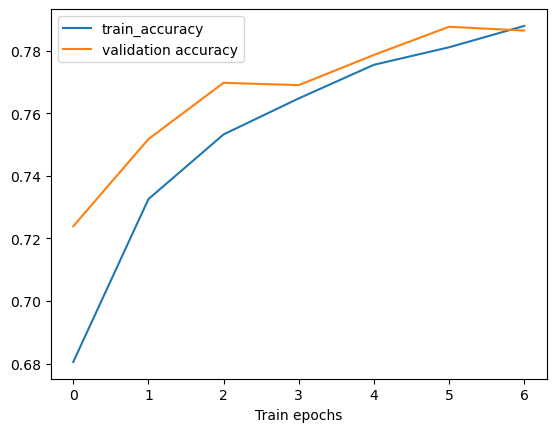

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 852,737
Trainable params: 852,737
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
num_epochs4=7
      

# Train the model.
history4 = model4.fit(x=norm_train_imgs2,y=train_labels, epochs=num_epochs4, batch_size=64,
                    validation_data=(norm_val_imgs2, val_labels),verbose=0)


train4_accuracy = history4.history['accuracy']
val4_accuracy = history4.history['val_accuracy']
plt.plot(train4_accuracy, label='train_accuracy')
plt.plot(val4_accuracy, label='validation accuracy')
plt.xticks(range(num_epochs4))
plt.xlabel('Train epochs')
plt.legend()
plt.show()



print(model4.summary())

In [33]:
print(train4_accuracy[-1])
print(val4_accuracy[-1])

0.7879250049591064
0.7864500284194946


# Test Set Results

In [34]:
test_accuracy = model4.evaluate(x=norm_test_imgs2, y=test_labels, verbose=0,return_dict=True)['accuracy']

In [35]:
print(test_accuracy)

0.7856500148773193


In [36]:
model4.evaluate(x=norm_test_imgs2, y=test_labels, return_dict=True)

625/625 [==============================] - 0s 669us/step - loss: 0.4492 - accuracy: 0.7857


{'loss': 0.4492429792881012, 'accuracy': 0.7856500148773193}

In [37]:
test_preds = model4.predict(norm_test_imgs2).flatten()

625/625 [==============================] - 0s 550us/step


In [38]:
final_test_preds = [1 if t > 0.5 else 0 for t in test_preds]

In [39]:
print(classification_report(final_test_preds, test_labels))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80     11259
           1       0.72      0.83      0.77      8741

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.78     20000
weighted avg       0.79      0.79      0.79     20000



In [40]:
classes

['FAKE', 'REAL']

In [41]:
train_list[0][1].numpy()

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

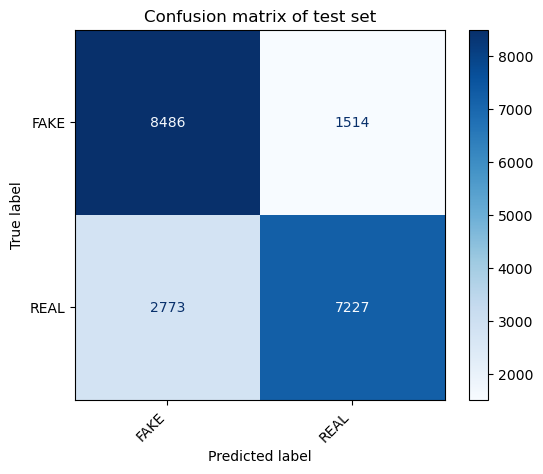

In [42]:
ConfusionMatrixDisplay.from_predictions(test_labels, final_test_preds, display_labels=classes, cmap='Blues')

plt.title('Confusion matrix of test set')
plt.xticks(rotation=45, ha='right')
plt.show()
